# Practical No. : 2

###### Aim: Implement lasso regression in a given dataset and perform.

###### Dataset:car data.csv

###### Tool : Jupiter

In [1]:
#import some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn import metrics
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [2]:
# To load csv file
df= pd.read_csv("G:/raw_data/car data.csv")
print(df.head(5))

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [3]:
#for checking datatype and null value also
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
#to replace the value category into numerical
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace =True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace =True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace =True)

In [5]:
print(df)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0       ritz  2014           3.35           5.59       27000          0   
1        sx4  2013           4.75           9.54       43000          1   
2       ciaz  2017           7.25           9.85        6900          0   
3    wagon r  2011           2.85           4.15        5200          0   
4      swift  2014           4.60           6.87       42450          1   
..       ...   ...            ...            ...         ...        ...   
296     city  2016           9.50          11.60       33988          1   
297     brio  2015           4.00           5.90       60000          0   
298     city  2009           3.35          11.00       87934          0   
299     city  2017          11.50          12.50        9000          1   
300     brio  2016           5.30           5.90        5464          0   

     Seller_Type  Transmission  Owner  
0              0             0      0  
1              0   

<AxesSubplot:>

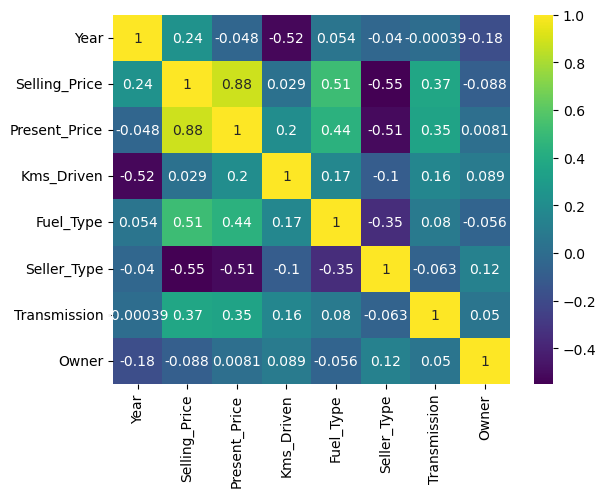

In [6]:
# to check the corelation we use the corelation matrix
corrMatrix =df.corr()
sns.heatmap(corrMatrix, annot =True ,  cmap ='viridis')

In [7]:
# x and y variable as dependent and independent variable
x =df.drop(["Car_Name","Selling_Price"], axis=1)
y = df["Selling_Price"]
print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=1)

In [10]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
102  2017           1.78        4000          0            1             0   
80   2016          14.89       23000          1            0             0   
245  2012           9.40       71000          1            0             0   
163  2010           0.95       27000          0            1             0   
131  2015           0.82       18000          0            1             0   
..    ...            ...         ...        ...          ...           ...   
203  2011           4.60       53460          0            0             0   
255  2012           5.35       53675          0            0             0   
72   2013          18.61       56001          0            0             0   
235  2017           9.40       15141          0            0             0   
37   2003           2.28      127000          0            1             0   

     Owner  
102      0  
80       0  
245      0  
163      0 

In [11]:
#model train
lasso= Lasso(0.1) 
lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

In [12]:
#predict the value
Y_predic = lasso.predict(x_test)
Y_predic

array([ 6.807476  ,  2.90556487, -0.34472445,  4.18259573,  0.84027044,
        5.93382531,  2.36589976,  2.52829183,  8.12483205,  1.38331628,
        7.43638937,  3.56423065,  4.91613272,  4.38575908, -2.25015996,
        2.35015278,  7.39145722,  6.05127271,  5.8679953 ,  7.4062017 ,
        5.01086141,  4.12385075, 10.92560564,  7.0624687 ,  8.84028973,
        5.73800727,  4.09174842,  1.4521807 , -0.18930935, -0.29549621,
        0.35899098, -1.00448611,  4.32288481, 19.99098519, 17.84981731,
        4.36517098,  3.510423  ,  2.06947961, -0.07431606,  4.61751626,
        8.52735325,  9.42470799,  0.40754989,  5.27615238,  5.15285624,
        4.40164872,  6.7261956 ,  6.09105127,  7.6124212 ,  2.1255978 ,
        3.83193327,  2.15531099,  2.39814023,  4.34135171,  1.91748013,
       -3.23338278, 19.90006087,  0.99873655,  5.6279794 ,  5.82548081,
       -0.31366639])

In [13]:
#calculating root mean sq error
mse= np.sqrt(metrics.mean_squared_error(y_test,Y_predic))
print('Root Mean Square Error:',mse)

Root Mean Square Error: 1.65687755863891


In [14]:
#calculating mean_absolute_error
mae = metrics.mean_absolute_error(y_test,Y_predic)
print('Root Mean Absolute Error:',mae)

Root Mean Absolute Error: 1.028375506920725


In [15]:
# calculating r2 for finding difference between actual and predict value
r2= metrics.r2_score(y_test,Y_predic)
print('Square root:',r2)

Square root: 0.8734571672225574


In [16]:
# intercept value of lasso regeration
intercep=lasso.intercept_
print(intercep)

-886.4996734315849


In [17]:
#coeffiecient value of lasso regeration
weights = lasso.coef_
print(weights)

[ 4.40763472e-01  4.83063321e-01 -2.45741400e-06  8.63865101e-01
 -6.04659342e-01  6.58957540e-01  0.00000000e+00]


In [18]:
print(weights,intercep)

[ 4.40763472e-01  4.83063321e-01 -2.45741400e-06  8.63865101e-01
 -6.04659342e-01  6.58957540e-01  0.00000000e+00] -886.4996734315849


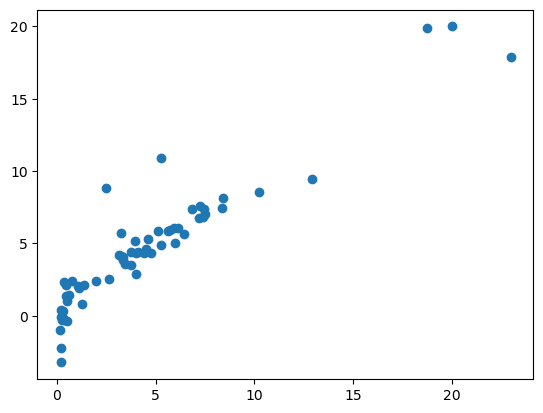

In [19]:
plt.scatter(y_test,Y_predic)
plt.show()

<AxesSubplot:xlabel='Selling_Price'>

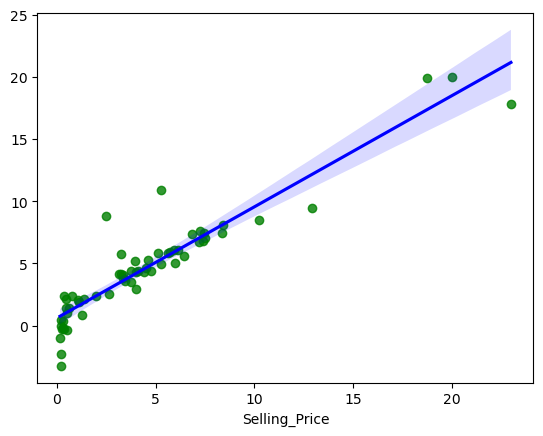

In [20]:
sns.regplot(x=y_test, y=Y_predic, scatter_kws={'color':'green'}, line_kws={"color":'blue'})

In [21]:
pearson_coef = pearsonr(y_test,Y_predic)
pearson_coef

PearsonRResult(statistic=0.9351885846315755, pvalue=2.784940972203121e-28)

In [22]:
spearman_coef = spearmanr(y_test,Y_predic)
spearman_coef

SpearmanrResult(correlation=0.9276930256715682, pvalue=6.317666875315182e-27)

###### Result :
The RMSE, Root MAE, and coefficients suggest a model that captures patterns well without being overly complex (balanced bias and variance).The correlations near zero suggest low sensitivity to linear or monotonic relationships (low bias or low sensitivity, depending on context).
Root Mean Square Error: 1.8909520511523887

Root Mean Absolute Error: 1.028375506920725

The squared root (R-squared) should be interpreted carefully; a high value might indicate good fit but could also imply overfitting.
Square root: 0.8734571672225574

Intercept:-802.5143087077621

coeff: [ 3.99126153e-01  4.79891251e-01 -3.07424823e-06  6.83305061e-01, -6.36528488e-01  3.74808065e-01 -0.00000000e+00]

PearsonRResult(statistic=-0.03285061998899762, pvalue=0.8015578684758926)
SpearmanrResult(correlation=-0.033667452224531914, pvalue=0.7967277348236803)